# Временные ряды 1.  Введение в задачу анализа временных рядов


#### 1. Выберите наборы данных, которые можно интерпретировать как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    в) количество отказов компьютера,
    г) число обращений в поликлинику по району,
    д) координаты автобуса при движении по маршруту,
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.
#### Ответ:
    а) можно интерпретировать как временной ряд
    б) в целом можно рассматривать как временной ряд, если речь идет о регулярном замере скорости на протяжении полета через равные промежутки времени или, например, если, например, мы мерим среднюю скорость перелета регулярного рейса, чтобы предсказать его скорость в будущем
    в) можно интерпретировать как временной ряд, если опять же речь идет о регулярном подсчете числа отказов компьтера, например в месяц
    г) можно
    д) в целом тоже можно интерпретировать как временной ряд, замеры координат автобуса через какие-то промежутки времени. Только мне не очень понятно, зачем это может быть нужно
    е) если речь идет о поиске координат фигуры нарушителя в видео-файле, то можно интерпретировать их как временной ряд. Например для предсказания его дальнейшей траектории передвижения в системе координат видео кадра

#### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data.info()

DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


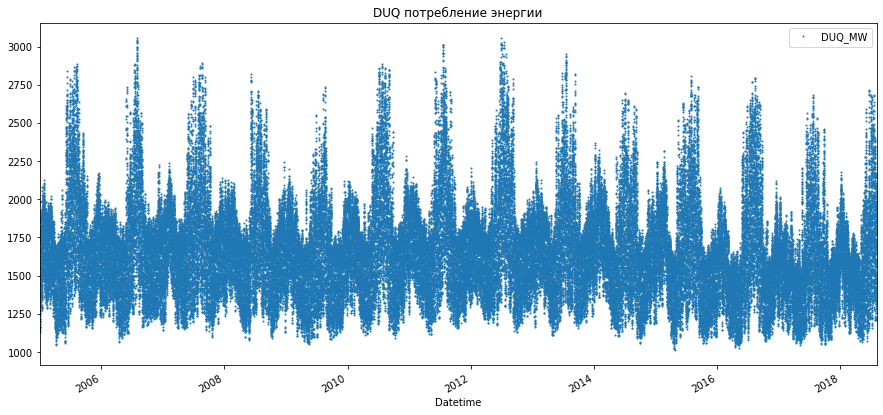

In [6]:
data.plot(style='.', figsize=(15, 7), ms=2, title='DUQ потребление энергии')

#### Описание особенностей выборки
- Основные статистики показали, что пропусков нет
- Визуальный анализ показывает что:
    - Предъявленные данные имеют циклы
    - Аномалий по графику не обнаружено

#### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [7]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [8]:
brent_monthly_mean = brent_data.resample('M').mean()
brent_monthly_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [9]:
brent_weekly_mean = brent_data.resample('W').mean()
brent_weekly_mean.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


#### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

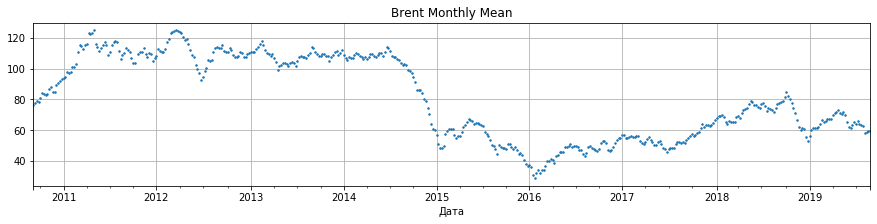

In [10]:
brent_weekly_mean.plot(style='.', figsize=(15, 3), ms=3, grid=True, legend=False, title='Brent Monthly Mean')

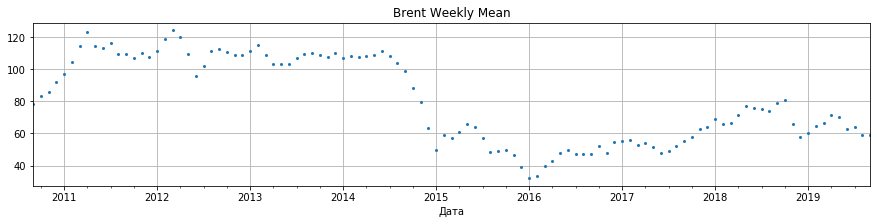

In [11]:
brent_monthly_mean.plot(style='.', figsize=(15, 3), ms=4, grid=True, legend=False, title='Brent Weekly Mean')

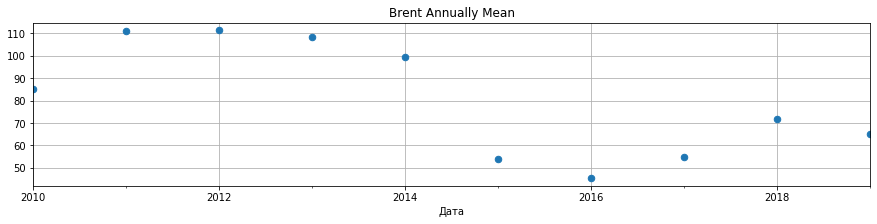

In [12]:
brent_data.resample('Y').mean().plot(style='.', figsize=(15, 3), ms=13, grid=True, legend=False, title='Brent Annually Mean')

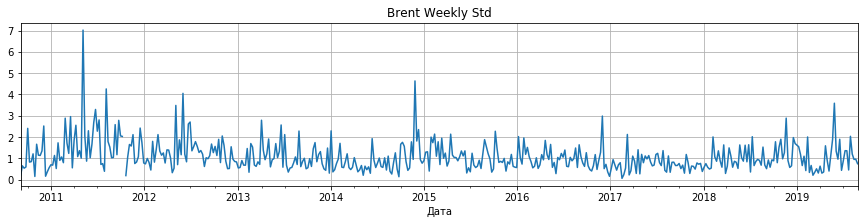

In [13]:
brent_data.resample('W').std().plot(figsize=(15, 3), grid=True, legend=False, title='Brent Weekly Std')

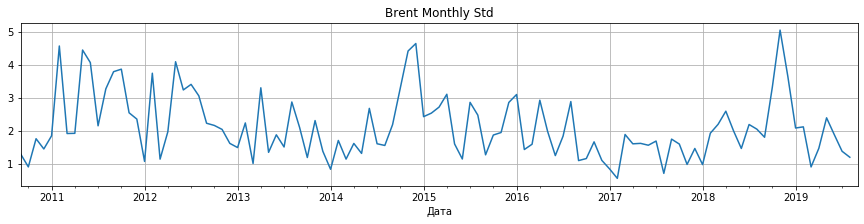

In [14]:
brent_data.resample('M').std().plot(figsize=(15, 3), ms=5, grid=True, legend=False, title='Brent Monthly Std')

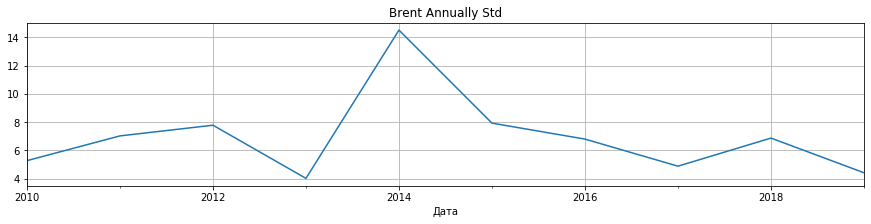

In [15]:
brent_data.resample('Y').std().plot(figsize=(15, 3), ms=5, grid=True, legend=False, title='Brent Annually Std')

#### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

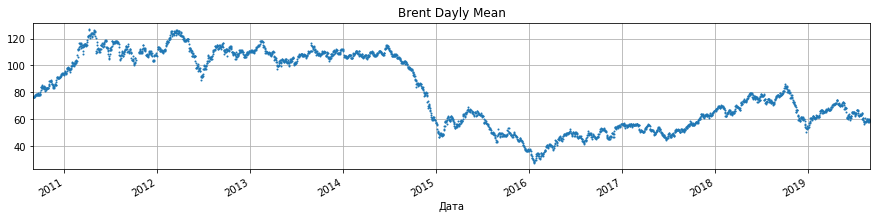

In [16]:
brent_data.plot(style='.', figsize=(15, 3), ms=2, grid=True, legend=False, title='Brent Dayly Mean')

Поведение цены на недельных и месячных графиках по сравнению с дневными стало менее шумным по сравнению с дневными, то есть более сглаженным.

В целом тенденции поведения графиков сохраняются.